# Pymaceuticals Inc.
---

### Analysis

- There was no significant change in tumor size for the placebo group. Looking at both the boxt plot and the summary statistics it shows that the mice, in the placebo group, had tumor volumes that stayed random and high throughout the drug study. This shows the importance of having control groups when testing, especially for medications, so you can tell if there is a development or not. The most effective treatments seem to be Capomulin and Ramicane. Again, both the box plots and summary statistics show that these two medications have the lowest average tumor volumes when in comparison to the other medications. If you also look at the interquartile ranges theyare smaller which means less outliers and more consistency when it comes to the tumor size shrinking in majority of mice. Looking at the linear regression and scatter plot they show a strong positive correlation between Mouse Weight and Tumor Volume for the mice treated with Capomulin specifically. From this we can conclude that the bigger mice normally have larger tumors. In the grand scheme of things that could influence the drugs effectiveness. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
print(merged_data.head())

  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25  


In [2]:
# Checking the number of mice.
len(mouse_metadata["Mouse ID"].unique())

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = study_results[study_results.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_mouse_ids = duplicate_mice["Mouse ID"].unique()
np.array(duplicate_mouse_ids)

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_data = merged_data[merged_data["Mouse ID"] == "g989"]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = merged_data.drop_duplicates(subset="Mouse ID")
clean_data = merged_data[merged_data["Mouse ID"] != "g989"]
clean_data = clean_data[["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites", 
                          "Drug Regimen", "Sex", "Age_months", "Weight (g)"]]
clean_data.reset_index(drop=True, inplace=True)
display(clean_data.head(5))

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = clean_data["Mouse ID"].nunique()
print(clean_mouse_count)

248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_statistics = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
summary_statistics = summary_statistics.rename(columns={
    "mean": "Mean Tumor Volume",
    "median": "Median Tumor Volume",
    "var": "Tumor Volume Variance",
    "std": "Tumor Volume Std. Dev.",
    "sem": "Tumor Volume Std. Err."})

# Assemble the resulting series into a single summary DataFrame.
summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
#summary_statistics = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].describe()[["mean", "median", "var", "std"]]
#summary_statistics["sem"] = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    mean="mean", 
    median="median",
    var="var", 
    std="std",
    sem="sem")

summary_statistics

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

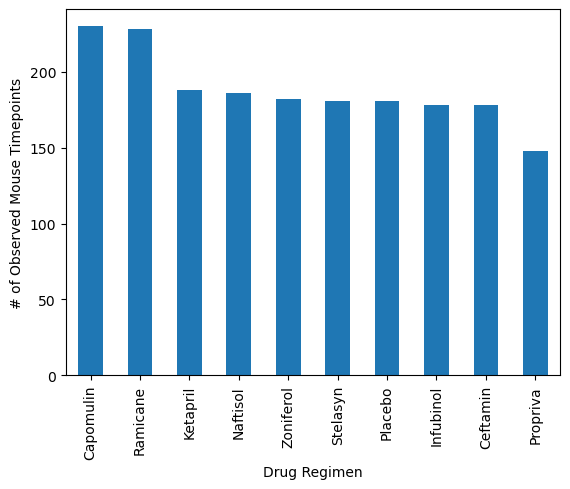

In [22]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
pandas_bar_plot = clean_data["Drug Regimen"].value_counts()
pandas_bar_order = pandas_bar_plot.loc[["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Stelasyn", "Placebo", "Infubinol", "Ceftamin", "Propriva"]]
ax = pandas_bar_order.plot(kind="bar", figsize=(5.8,5)) 
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("# of Observed Mouse Timepoints")

plt.tight_layout()
plt.show()

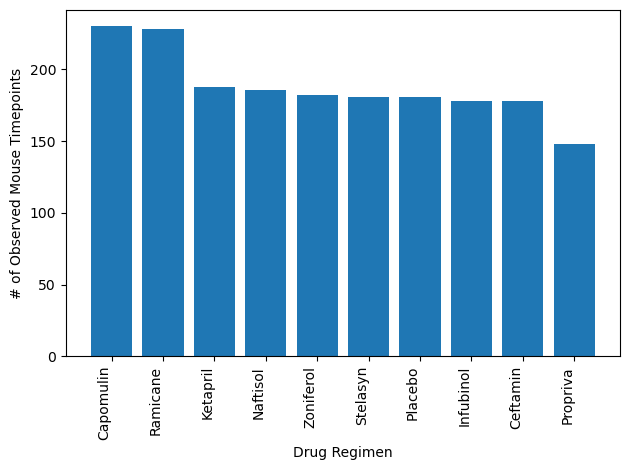

In [18]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
py_bar_plot = clean_data["Drug Regimen"].value_counts()
py_bar_order = py_bar_plot.loc[["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Stelasyn", "Placebo", "Infubinol", "Ceftamin", "Propriva"]]
plt.bar(py_bar_plot.index, py_bar_plot.values)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90, ha="right")

plt.tight_layout()
plt.show()

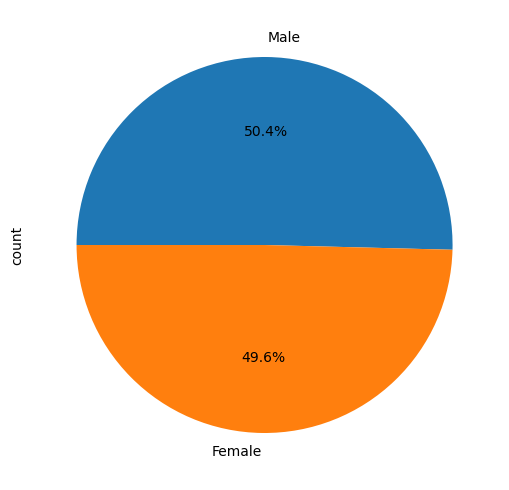

In [30]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
unique_mice_gender = clean_data.drop_duplicates(subset=["Mouse ID"])[["Sex"]]
gender_counts = unique_mice_gender["Sex"].value_counts()

# Make the pie chart
gender_counts.plot(kind="pie", autopct="%1.1f%%", figsize=(5.8,5), startangle=180, counterclock=False)
plt.ylabel("count")

plt.tight_layout()
plt.show()

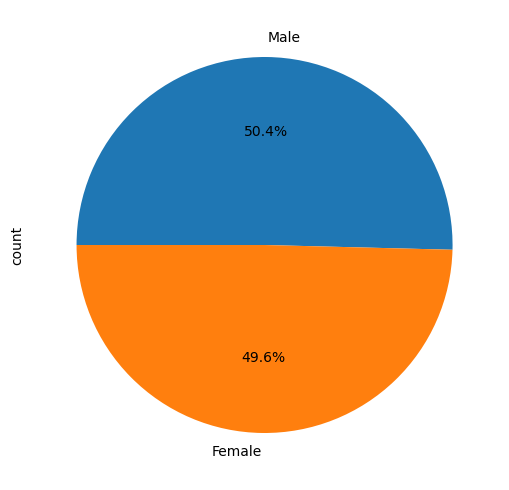

In [29]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
unique_mice_gender = clean_data.drop_duplicates(subset=["Mouse ID"])[["Sex"]]
gender_counts = unique_mice_gender["Sex"].value_counts()

# Make the pie chart
plt.figure(figsize=(5.8,5))
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%", startangle=180, counterclock=False)
plt.ylabel("count")

plt.tight_layout()
plt.show()

## Quartiles, Outliers and Boxplots

In [31]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_data.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_tumor_volume = pd.merge(last_timepoint, clean_data, on=["Mouse ID", "Timepoint"])

In [47]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = last_tumor_volume[last_tumor_volume["Drug Regimen"] == drug]["Tumor Volume (mm3)"]

    # add subset
    tumor_volumes.append(treatment_data)

    # Determine outliers using upper and lower bounds
    quartiles = treatment_data.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = treatment_data[~treatment_data.between(lower_bound, upper_bound)]

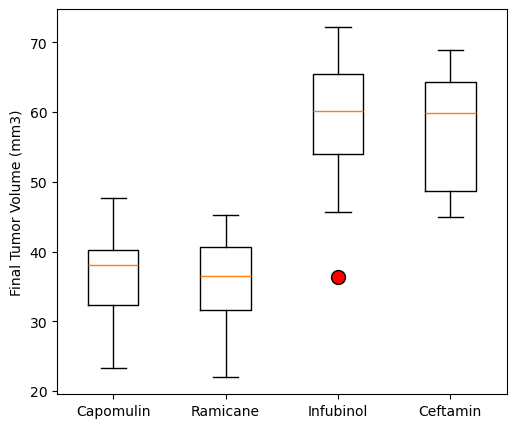

In [48]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure(figsize=(5.8,5))
flierprops = {"marker": "o", "markerfacecolor": "red", "markersize": 10, "linestyle": "none"}
plt.boxplot(tumor_volumes, tick_labels=treatments, flierprops=flierprops)
plt.ylabel("Final Tumor Volume (mm3)")

plt.show()

## Line and Scatter Plots

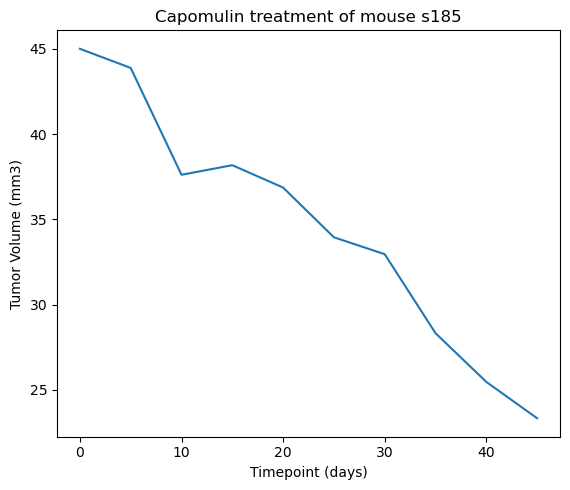

In [50]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = "s185"
mouse_data = clean_data[(clean_data["Mouse ID"] == mouse_id) & (clean_data["Drug Regimen"] == "Capomulin")]

plt.figure(figsize=(5.8,5))
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Capomulin treatment of mouse {mouse_id}")

plt.tight_layout()
plt.show()

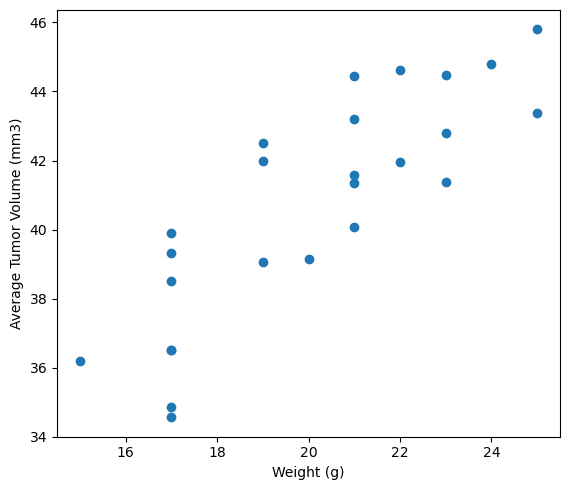

In [52]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Capomulin_data = clean_data[clean_data["Drug Regimen"] == "Capomulin"]

avg_tumor_volume = Capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weight = Capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()

plt.figure(figsize=(5.8,5))
plt.scatter(mouse_weight, avg_tumor_volume)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.tight_layout()
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


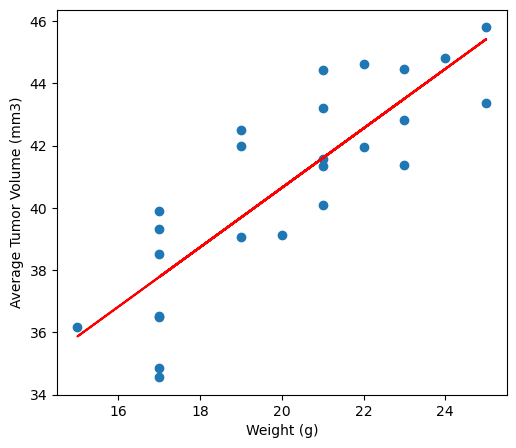

In [57]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
slope, intercept, r_value, p_value, std_err = st.linregress(mouse_weight, avg_tumor_volume)
regressions = slope * mouse_weight + intercept

print(f"The correlation between mouse weight and average tumor volume is {r_value:.2f}")

plt.figure(figsize=(5.8,5))
plt.scatter(mouse_weight, avg_tumor_volume)
plt.plot(mouse_weight, regressions, color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()